In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [36]:
data = pd.read_csv("C:\\Users\\SHUBHAM\\Downloads\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [38]:
data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

## Visualization :--

In [39]:
import seaborn as sn
import matplotlib.pyplot as plt

C:\Program Files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population'>

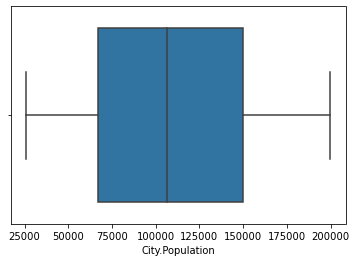

In [40]:
sn.boxplot(data['City.Population'])

(array([70., 61., 68., 60., 64., 64., 51., 61., 42., 59.]),
 array([ 25779. ,  43178.9,  60578.8,  77978.7,  95378.6, 112778.5,
        130178.4, 147578.3, 164978.2, 182378.1, 199778. ]),
 <BarContainer object of 10 artists>)

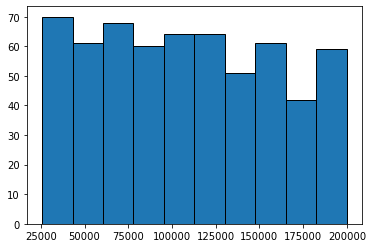

In [41]:
plt.hist(data['City.Population'], edgecolor='Black')

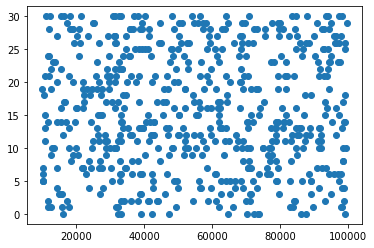

In [42]:
plt.scatter(data['Taxable.Income'] , data['Work.Experience'])

In [43]:
## there is no any correlation with taxable income and work experience

## Data Preprocessing :--

In [44]:
label_encoder = LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

In [45]:
data['taxable_income'] = data['Taxable.Income'].map(lambda a:'risky' if a <= 30000 else 'good')

In [46]:
data.drop(['Taxable.Income'],axis=1, inplace=True)

In [47]:
data['taxable_income'] = label_encoder.fit_transform(data['taxable_income'])

In [48]:
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


## Train Test Split :-- 

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]

In [52]:
x_train,x_test, y_train,y_test = train_test_split(X,Y, test_size=0.30)

In [53]:
print("Our traning size is ", x_train.shape)
print("Our testing size is ",x_test.shape)

Our traning size is  (420, 5)
Our testing size is  (180, 5)


## Model Building :--

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier()

### also we will do hyperparameter tuning :--

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

In [58]:
parameter = { 'n_estimators' : np.array(range(50,401,50)),
             'min_samples_split' : np.array([2,4,6,8]),
             'max_features' : np.array(['sqrt','log2'])}
parameter

{'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400]),
 'min_samples_split': array([2, 4, 6, 8]),
 'max_features': array(['sqrt', 'log2'], dtype='<U4')}

In [64]:
fin_model = GridSearchCV(estimator=model, param_grid=parameter , n_jobs=-1)

fin_model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': array(['sqrt', 'log2'], dtype='<U4'),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400])})

In [68]:
# Our best parameters are :-
fin_model.best_params_

{'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 350}

In [66]:
pred = fin_model.predict(x_test)

In [67]:
accuracy = accuracy_score(y_test, pred)
print("The accuracy of our model is :- ", accuracy)

The accuracy of our model is :-  0.7777777777777778


## Lets do K-fold cross Validation :--

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [72]:
cv = KFold(n_splits=10)
accuracy2 = cross_val_score(fin_model, X,Y, cv=cv,n_jobs=-1)

In [73]:
print("The accuracy of our model aftering doing k fold cross validation is :-- ", accuracy2.mean())

The accuracy of our model aftering doing k fold cross validation is :--  0.7833333333333332


## As we can see after doing the cross validation our accuarcy has been increased litle .